<a href="https://colab.research.google.com/github/hsallrounder/Algorithm-For-Intelligent-Systems-And-Robotics-Lab/blob/master/Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3 MB 5.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 39 kB/s 
     |████████████████████████████████| 3.8 MB 40.3 MB/s 
     |████████████████████████████████| 449 kB 48.6 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bffcb28964f2e4f7891215471d4127efbb72c2642ecb3d1af1ccab8dc8a7e34a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
import tensorflow as tf
!pip install keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,Conv2D, MaxPool2D, Dropout

In [ ]:
print(tf.__version__)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Load Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
X_train.max()

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

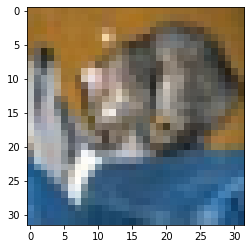

In [ ]:
plt.imshow(X_test[0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))
model.add(Dropout(0.5))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation= 'softmax', kernel_regularizer='l2'))
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(200, activation='relu', kernel_regularizer=keras.regularizers.l1()),
#     keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     keras.layers.Dense(50, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(0.01)),
#     keras.layers.Dense(10, activation='softmax')
# ])
# sgd = keras.optimizers.SGD(lr=0.01)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
# model.fit(train_images, train_labels, epochs=60, validation_data=(validation_images, validation_labels))
# model.evaluate(test_images, test_labels)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

# New Section

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.2418 - accuracy: 0.5691 - val_loss: 1.1388 - val_accuracy: 0.6026
Epoch 2/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.1879 - accuracy: 0.5872 - val_loss: 1.1150 - val_accuracy: 0.6072
Epoch 3/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.1522 - accuracy: 0.6018 - val_loss: 1.0752 - val_accuracy: 0.6297
Epoch 4/10
5000/5000 [==============================] - 25s 5ms/step - loss: 1.1236 - accuracy: 0.6131 - val_loss: 1.0563 - val_accuracy: 0.6334
Epoch 5/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.0947 - accuracy: 0.6218 - val_loss: 1.0426 - val_accuracy: 0.6416
Epoch 6/10
5000/5000 [==============================] - 24s 5ms/step - loss: 1.0720 - accuracy: 0.6293 - val_loss: 1.0696 - val_accuracy: 0.6317
Epoch 7/10
5000/5000 [==============================] - 25s 5ms/step - loss: 1.0557 - accuracy: 0.6380 - val_loss: 1.0266 - val_ac

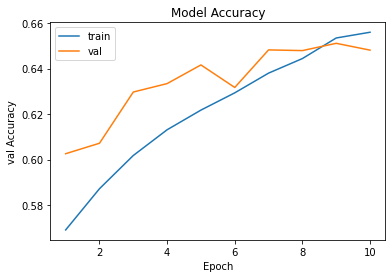

In [ ]:

from matplotlib import pyplot as plt
epoch_range=range(1, 11)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('val Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
mat=confusion_matrix(y_test, y_pred)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f48c4457690>)

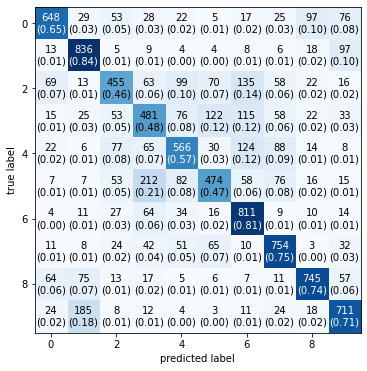

In [ ]:
plot_confusion_matrix(mat, figsize=(6,6), show_normed=True)